## Import required modules and load data file

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
from matplotlib import cm
x=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=x[:50],x[50:],y[:50],y[50:]

In [4]:
x_train.head(2)

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59


In [5]:
y_train.head(2)

0    1
1    1
Name: fruit_label, dtype: int64

In [38]:
x=fruits[['height','width','mass']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [39]:
x_train.head(2)

,height,width,mass
42,7.2,7.2,154
48,10.1,7.3,174


## create classifier object

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

## Train the classifier(fit the estimator)using the training data

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
x_test

,height,width,mass
26,9.2,9.6,362
35,7.9,7.1,150
43,10.3,7.2,194
28,7.1,6.7,140
11,7.6,7.1,172
2,7.2,7.4,176
34,7.8,7.6,142
46,10.2,7.3,216
40,7.5,7.1,154
22,7.1,7.3,140


In [43]:
y_test.head(2)

26    3
35    3
Name: fruit_label, dtype: int64

In [44]:
fruit_prediction=knn.predict([[362,9.6,9.2]])
fruit_prediction

array([2], dtype=int64)

In [45]:
fruit_prediction=knn.predict([  [362,9.6,9.2],[176,7.4,7.2]  ])
fruit_prediction

array([2, 2], dtype=int64)

In [46]:
names={1:'Apple',2:'mandrain',3:'orange',4:'lemon'}
for each in fruit_prediction:
    print(names[each])

mandrain
mandrain


## Estimate the accuracyof the classifier on future data,using the test data

In [47]:
knn.score(x_test,y_test)

0.5333333333333333

In [56]:
k_range=range(1,20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

In [57]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

<IPython.core.display.Javascript object>


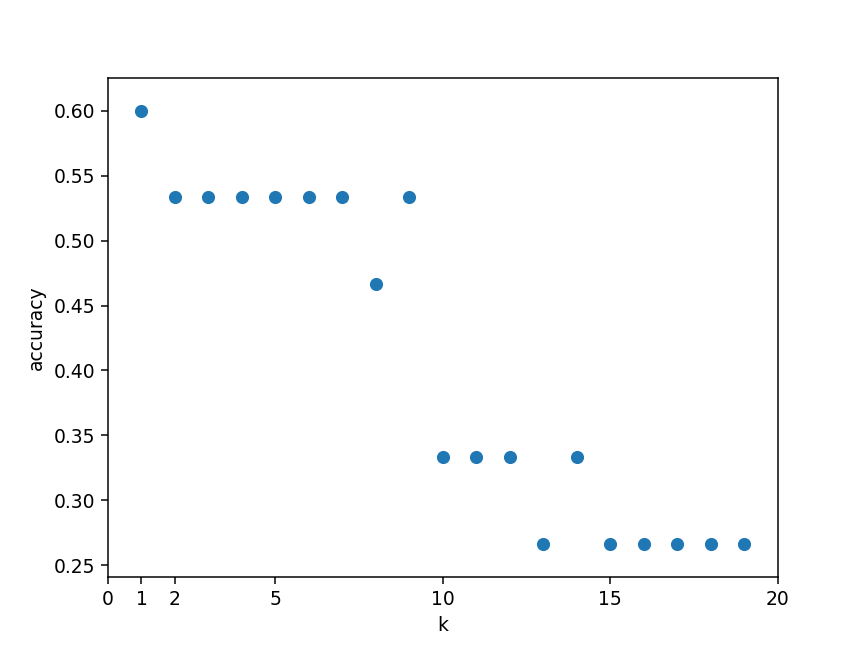

([<matplotlib.axis.XTick at 0x191c252a160>,
 <a list of 7 Text xticklabel objects>)

In [58]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,1,2,5,10,15,20])